In [1]:
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)

# Extracting data (a table) from a PDF file

### For extracting a table from PDF file I used Camelot library

In [2]:
conda install -c conda-forge camelot-py

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [3]:
import camelot

In [4]:
file = "/Users/anastasia/Downloads/reestr-inostrannyih-agentov-05-05-2023.pdf"

In [5]:
tables = camelot.read_pdf(file, pages='all')
tables

<TableList n=20>

In [6]:
print("Total tables extracted:", tables.n)

Total tables extracted: 20


In [7]:
print(tables[2].df)

       0                                                  1              2   \
0   № п/п                            Полное наименование/ФИО  Дата рождения   
1      83  Нижегородская областная социально-\nэкологичес...                  
2      84                        ФОНД «ГРАЖДАНСКОЕ ДЕЙСТВИЕ»                  
3      85  Некоммерческое партнерство «Альянс \nфондов ме...                  
4      86  Кабардино-Балкарский \nреспубликанский обществ...                  
5      87  ЧЕЧЕНСКАЯ РЕГИОНАЛЬНАЯ \nОБЩЕСТВЕННАЯ ОРГАНИЗА...                  
6      88  Межрегиональный общественный \nэкологический ф...                  
7      89  ОБЩЕСТВЕННАЯ ОРГАНИЗАЦИЯ \n«ПЕРМСКИЙ РЕГИОНАЛЬ...                  
8      90  Региональная общественная \nорганизация по улу...                  
9      91              Фонд в поддержку демократии \n«ГОЛОС»                  
10     92  Региональная общественная \nорганизация  «Евре...                  
11     93  Региональная общественная \nорганизация «

In [8]:
df = pd.concat([tab.df for tab in tables], ignore_index=True)
df.to_csv('/Users/anastasia/Downloads/inoagenty.csv')

In [9]:
agents = pd.read_csv('/Users/anastasia/Downloads/inoagenty.csv')
agents2 = agents.drop('Unnamed: 0',axis=1)

In [10]:
agents = agents2[['0','1','2','9','10','11','12']]
agents = agents.rename(columns={'0': 'num', '1': 'name', '2': 'birth_date', '9': 'participants_names', '10': 'grounds_for_inclusion','11':'date_of_inclusion','12':'date_of_exclusion'})

In [11]:
agents.head(5)

,num,name,birth_date,participants_names,grounds_for_inclusion,date_of_inclusion,date_of_exclusion
0,№ п/п,Полное наименование/ФИО,Дата рождения,Полное наименование/ФИО \nучастников,Основания включения,Дата принятия \nрешения о \nвключении,Дата принятия \nрешения об \nисключении
1,1,«Евразийская антимонопольная \nассоциация»,NaN,NaN,Статья 32 Федерального закона \nот 12.01.1996 ...,27.06.2013,NaN
2,2,Ассоциация некоммерческих \nорганизаций «В защ...,NaN,NaN,Статья 32 Федерального закона \nот 12.01.1996 ...,05.06.2014,13.03.2020
3,3,Региональная общественная \nправозащитная орга...,NaN,NaN,Статья 32 Федерального закона \nот 12.01.1996 ...,05.06.2014,29.02.2016
4,4,Автономная некоммерческая научно-\nисследовате...,NaN,NaN,Статья 32 Федерального закона \nот 12.01.1996 ...,05.06.2014,22.05.2015


# Data Cleaning

In [12]:
agents[agents['birth_date']=='Дата рождения']
agents = agents.drop(agents[agents['birth_date']=='Дата рождения'].index).reset_index(drop = True)

In [13]:
agents.birth_date = agents.birth_date.fillna(0)
agents.participants_names = agents.participants_names.fillna('NaN')
agents[agents.birth_date != 0]
agents['status'] = np.where(agents['birth_date']!= 0, 'individual', 'entity')

In [14]:
grounds = []
for i in agents.grounds_for_inclusion:
    grounds.append(i.replace("\n", ""))
agents['grounds_for_inclusion'] = grounds

In [15]:
names = []
for i in agents.name:
    names.append(i.replace("\n", ""))
agents['name'] = names

In [16]:
agents.name[1]

'Ассоциация некоммерческих организаций «В защиту прав избирателей «ГОЛОС»'

In [17]:
agents.grounds_for_inclusion.value_counts()

Статья 32 Федерального закона от 12.01.1996 № 7-ФЗ «О некоммерческих организациях»                                                                                                                 218
Статья 6 Закона Российской Федерации от 27.12.1991 № 2124-1 «О средствах массовой информации»                                                                                                      175
Статья 7 Федерального закона от 14.07.2022 № 255-ФЗ«О контроле за деятельностью лиц, находящихся под иностранным влиянием»                                                                         101
Статья 2.1 Федерального закона от 28.12.2012 № 272-ФЗ «О мерах воздействия на лиц, причастных к нарушениям основополагающих прав и свобод человека, прав и свобод граждан Российской Федерации»     62
Статья 25.1 Закона Российской Федерации от 27.12.1991 № 2124-1 «О средствах массовой информации»                                                                                                    27
Стать

In [18]:
def f(agents):
    if agents.grounds_for_inclusion == 'Статья 32 Федерального закона от 12.01.1996 № 7-ФЗ «О некоммерческих организациях»':
        val = 'НКО'
    elif agents.grounds_for_inclusion == 'Статья 25.1 Закона Российской Федерации от 27.12.1991 № 2124-1 «О средствах массовой информации»':
        val = 'СМИ'
    elif agents.grounds_for_inclusion == 'Статья 29.1 Федерального закона от 19.05.1995 № 82-ФЗ «Об общественных объединениях»':
        val = 'Общественные объединения'
    elif agents.grounds_for_inclusion == 'Статья 6 Закона Российской Федерации от 27.12.1991 № 2124-1 «О средствах массовой информации»':
        val = 'ФЛ_СМИ'
    elif agents.grounds_for_inclusion == 'Статья 2.1 Федерального закона от 28.12.2012 № 272-ФЗ «О мерах воздействия на лиц, причастных к нарушениям основополагающих прав и свобод человека, прав и свобод граждан Российской Федерации»':
        val = 'ФЛ'
    elif agents.grounds_for_inclusion == 'Статья 7 Федерального закона от 14.07.2022 № 255-ФЗ«О контроле за деятельностью лиц, находящихся под иностранным влиянием»':
        val = 'Статья_7'
    else :
        val = 'Статья_9'
    return val

#create new column 'Good' using the function above
agents['form'] = agents.apply (f, axis=1)

#view DataFrame 
agents

,num,name,birth_date,participants_names,grounds_for_inclusion,date_of_inclusion,date_of_exclusion,status,form
0,1,«Евразийская антимонопольная ассоциация»,0,NaN,Статья 32 Федерального закона от 12.01.1996 № ...,27.06.2013,NaN,entity,НКО
1,2,Ассоциация некоммерческих организаций «В защит...,0,NaN,Статья 32 Федерального закона от 12.01.1996 № ...,05.06.2014,13.03.2020,entity,НКО
2,3,Региональная общественная правозащитная органи...,0,NaN,Статья 32 Федерального закона от 12.01.1996 № ...,05.06.2014,29.02.2016,entity,НКО
3,4,Автономная некоммерческая научно-исследователь...,0,NaN,Статья 32 Федерального закона от 12.01.1996 № ...,05.06.2014,22.05.2015,entity,НКО
4,5,Региональная общественная организация в защиту...,0,NaN,Статья 32 Федерального закона от 12.01.1996 № ...,05.06.2014,20.02.2017,entity,НКО
...,...,...,...,...,...,...,...,...,...
593,594,Агафонова Елена Владимировна,25.05.1977,NaN,Статья 7 Федерального закона от 14.07.2022 № 2...,05.05.2023,NaN,individual,Статья_7
594,595,«Кризисная группа СК SOS» (North Caucasus SOS ...,0,Истеев Давид,Статья 7 Федерального закона от 14.07.2022 № 2...,05.05.2023,NaN,entity,Статья_7
595,596,Общество с ограниченной ответственностью «ТАЙГ...,0,NaN,Статья 7 Федерального закона от 14.07.2022 № 2...,05.05.2023,NaN,entity,Статья_7
596,597,Женское общественно-политическое движение «Мяг...,0,Алиева Елизавета; Белянкина \nЕкатерина; Брусс...,Статья 7 Федерального закона от 14.07.2022 № 2...,05.05.2023,NaN,entity,Статья_7


In [19]:
pd.DataFrame(agents.grounds_for_inclusion.value_counts())

,grounds_for_inclusion
Статья 32 Федерального закона от 12.01.1996 № 7-ФЗ «О некоммерческих организациях»,218
Статья 6 Закона Российской Федерации от 27.12.1991 № 2124-1 «О средствах массовой информации»,175
"Статья 7 Федерального закона от 14.07.2022 № 255-ФЗ«О контроле за деятельностью лиц, находящихся под иностранным влиянием»",101
"Статья 2.1 Федерального закона от 28.12.2012 № 272-ФЗ «О мерах воздействия на лиц, причастных к нарушениям основополагающих прав и свобод человека, прав и свобод граждан Российской Федерации»",62
Статья 25.1 Закона Российской Федерации от 27.12.1991 № 2124-1 «О средствах массовой информации»,27
Статья 29.1 Федерального закона от 19.05.1995 № 82-ФЗ «Об общественных объединениях»,11
"Статья 9 Федерального закона от 14.07.2022 № 255-ФЗ«О контроле за деятельностью лиц, находящихся под иностранным влиянием»",4


# Web Scraping a Wikipedia Table into a Dataframe

### I wanted to enrich the dataset with the professional occupation data of foreign agents-individuals

In [21]:
import requests 
from bs4 import BeautifulSoup 
import re

In [22]:
!pip install html5lib
!pip install lxml'

zsh:1: unmatched '


In [23]:
url = 'https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%B8%D0%BD%D0%BE%D1%81%D1%82%D1%80%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D0%B0%D0%B3%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_(%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F)'

response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [24]:
table = soup.find_all('table')

df = pd.read_html(str(table[2]))[0]

In [25]:
df = df.rename(columns = {'Имя': 'name','Род деятельности':'occupation'})

In [26]:
df['occupation'] = df['occupation'].astype('string')

In [27]:
df.head()

,№,name,occupation,Дата включения в реестр[15],Дата исключения из реестра
0,1,Пономарёв Лев Александрович,правозащитник,28.12.2020,NaN
1,2,Савицкая Людмила Алексеевна,журналистка Радио «Свобода»,28.12.2020,NaN
2,3,Маркелов Сергей Евгеньевич[d],журналист «7x7»,28.12.2020,NaN
3,4,Камалягин Денис Николаевич[d],главный редактор «Псковской губернии»,28.12.2020,NaN
4,5,Апахончич Дарья Александровна[d],художница-акционистка,28.12.2020,NaN


Cleaning names

In [28]:
df.name[2][-2:-1]

'd'

In [29]:
name_clean = []
for i in df.name:
    if i[-2:-1] == 'd':
        name_clean.append(i[:-3])
    else:
        name_clean.append(i)
df['name'] = name_clean

In [30]:
df2 = df[['name','occupation']]
df2

,name,occupation
0,Пономарёв Лев Александрович,правозащитник
1,Савицкая Людмила Алексеевна,журналистка Радио «Свобода»
2,Маркелов Сергей Евгеньевич,журналист «7x7»
3,Камалягин Денис Николаевич,главный редактор «Псковской губернии»
4,Апахончич Дарья Александровна,художница-акционистка
...,...,...
224,Архипова Александра Сергеевна,антрополог
225,Габуев Александр Тамерланович,востоковед
226,Пшеничная Анна Эдуардовна,журналистка
227,Цуканова Ольга Викторовна,"лидер движения ""Совет матерей и жен"""


In [31]:
agents_2 = agents.merge(df2, on = 'name', how = 'left')

In [32]:
agents_2.occupation = agents_2.occupation.fillna('NaN')

In [33]:
ind = agents_2[agents.status == 'individual']

In [34]:
ind.tail(5)

,num,name,birth_date,participants_names,grounds_for_inclusion,date_of_inclusion,date_of_exclusion,status,form,occupation
589,590,Албуров Георгий Валентинович,09.10.1989,NaN,Статья 7 Федерального закона от 14.07.2022 № 2...,05.05.2023,NaN,individual,Статья_7,"политический и общественный деятель, блогер"
590,591,Максакова-Игенбергс Мария Петровна,24.07.1977,NaN,Статья 7 Федерального закона от 14.07.2022 № 2...,05.05.2023,NaN,individual,Статья_7,оперная певица
591,592,Певчих Мария Константиновна,15.08.1987,NaN,Статья 7 Федерального закона от 14.07.2022 № 2...,05.05.2023,NaN,individual,Статья_7,журналист-расследователь
592,593,Пастухов Владимир Борисович,22.04.1963,NaN,Статья 7 Федерального закона от 14.07.2022 № 2...,05.05.2023,NaN,individual,Статья_7,"политолог, публицист и юрист"
593,594,Агафонова Елена Владимировна,25.05.1977,NaN,Статья 7 Федерального закона от 14.07.2022 № 2...,05.05.2023,NaN,individual,Статья_7,правозащитница


In [35]:
ind.shape

(283, 10)

In [36]:
ind.to_csv('/Users/anastasia/Downloads/ind.csv')

### Professional occupation data is not contained for all individuals in the foreign agents' list, so I added the missing data manually

In [37]:
agents_new = pd.read_csv('/Users/anastasia/Downloads/agents_with_occupation_5may.csv')

In [38]:
agents_new

,name,occupation
0,Апахончич Дарья Александровна,художник
1,Камалягин Денис Николаевич,журналист
2,Маркелов Сергей Евгеньевич,журналист
3,Пономарев Лев Александрович,юрист/адвокат/правозащитник
4,Савицкая Людмила Алексеевна,журналист
...,...,...
278,Албуров Георгий Валентинович,общественный/политический деятель
279,Максакова-Игенбергс Мария Петровна,музыкант
280,Певчих Мария Константиновна,журналист
281,Пастухов Владимир Борисович,политолог/политтехнолог


#### Let's add the 'sex' column to the table 'agents_new'

In [39]:
t = []
for name in agents_new.name:
    if name.endswith('на') is True:
        t.append('female')
    elif name.endswith('ич') is True:
        t.append('male')
    else:
        t.append('unknown')

In [40]:
agents_new['sex'] = t

In [41]:
agents_new[agents_new['sex'] == 'unknown']

,name,occupation,sex
151,Наки Майкл Сидней,журналист,unknown
209,Аскеров Ровшан Энвер оглы,журналист,unknown
227,Шелест Александр,журналист,unknown
236,Омбадыков Эрдни Басан,общественный/политический деятель,unknown
272,Грозев Христо,журналист,unknown


All the name with 'unknown' sex type belong to males

In [42]:
agents_new['sex'].loc[agents_new['sex'] == 'unknown']  = 'male'

In [43]:
agents_new['sex'].unique()

array(['female', 'male'], dtype=object)

In [44]:
agents_new

,name,occupation,sex
0,Апахончич Дарья Александровна,художник,female
1,Камалягин Денис Николаевич,журналист,male
2,Маркелов Сергей Евгеньевич,журналист,male
3,Пономарев Лев Александрович,юрист/адвокат/правозащитник,male
4,Савицкая Людмила Алексеевна,журналист,female
...,...,...,...
278,Албуров Георгий Валентинович,общественный/политический деятель,male
279,Максакова-Игенбергс Мария Петровна,музыкант,female
280,Певчих Мария Константиновна,журналист,female
281,Пастухов Владимир Борисович,политолог/политтехнолог,male


In [45]:
agents_2.head()

,num,name,birth_date,participants_names,grounds_for_inclusion,date_of_inclusion,date_of_exclusion,status,form,occupation
0,1,«Евразийская антимонопольная ассоциация»,0,NaN,Статья 32 Федерального закона от 12.01.1996 № ...,27.06.2013,NaN,entity,НКО,NaN
1,2,Ассоциация некоммерческих организаций «В защит...,0,NaN,Статья 32 Федерального закона от 12.01.1996 № ...,05.06.2014,13.03.2020,entity,НКО,NaN
2,3,Региональная общественная правозащитная органи...,0,NaN,Статья 32 Федерального закона от 12.01.1996 № ...,05.06.2014,29.02.2016,entity,НКО,NaN
3,4,Автономная некоммерческая научно-исследователь...,0,NaN,Статья 32 Федерального закона от 12.01.1996 № ...,05.06.2014,22.05.2015,entity,НКО,NaN
4,5,Региональная общественная организация в защиту...,0,NaN,Статья 32 Федерального закона от 12.01.1996 № ...,05.06.2014,20.02.2017,entity,НКО,NaN


In [46]:
agents_3 = agents_2.merge(agents_new, on = 'name', how = 'left')

In [47]:
agents_3.drop(['occupation_x'], axis=1, inplace = True)

In [48]:
agents_3.drop(['num'], axis=1, inplace = True)

In [49]:
agents_3.drop(['participants_names'], axis=1, inplace = True)

In [50]:
agents_3.rename(columns = {'occupation_y': 'occupation'}, inplace=True)

In [51]:
agents_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 599
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   name                   600 non-null    object
 1   birth_date             600 non-null    object
 2   grounds_for_inclusion  600 non-null    object
 3   date_of_inclusion      600 non-null    object
 4   date_of_exclusion      176 non-null    object
 5   status                 600 non-null    object
 6   form                   600 non-null    object
 7   occupation             284 non-null    object
 8   sex                    284 non-null    object
dtypes: object(9)
memory usage: 46.9+ KB


In [52]:
ind_new = agents_3[agents_3.status == 'individual']

In [53]:
ind_new[ind_new.name.duplicated()]

,name,birth_date,grounds_for_inclusion,date_of_inclusion,date_of_exclusion,status,form,occupation,sex
273,Ковин Виталий Сергеевич,09.03.1970,Статья 6 Закона Российской Федерации от 27.12....,29.09.2021,05.10.2022,individual,ФЛ_СМИ,общественный/политический деятель,male
490,Ковин Виталий Сергеевич,09.03.1970,Статья 2.1 Федерального закона от 28.12.2012 №...,25.11.2022,NaN,individual,ФЛ,общественный/политический деятель,male
491,Ковин Виталий Сергеевич,09.03.1970,Статья 2.1 Федерального закона от 28.12.2012 №...,25.11.2022,NaN,individual,ФЛ,общественный/политический деятель,male


In [54]:
ind_new[ind_new.name == 'Ковин Виталий Сергеевич']

,name,birth_date,grounds_for_inclusion,date_of_inclusion,date_of_exclusion,status,form,occupation,sex
272,Ковин Виталий Сергеевич,09.03.1970,Статья 6 Закона Российской Федерации от 27.12....,29.09.2021,05.10.2022,individual,ФЛ_СМИ,общественный/политический деятель,male
273,Ковин Виталий Сергеевич,09.03.1970,Статья 6 Закона Российской Федерации от 27.12....,29.09.2021,05.10.2022,individual,ФЛ_СМИ,общественный/политический деятель,male
490,Ковин Виталий Сергеевич,09.03.1970,Статья 2.1 Федерального закона от 28.12.2012 №...,25.11.2022,NaN,individual,ФЛ,общественный/политический деятель,male
491,Ковин Виталий Сергеевич,09.03.1970,Статья 2.1 Федерального закона от 28.12.2012 №...,25.11.2022,NaN,individual,ФЛ,общественный/политический деятель,male


In [55]:
ind_new = ind_new.drop_duplicates()

In [56]:
ind_new[ind_new.name == 'Ковин Виталий Сергеевич']

,name,birth_date,grounds_for_inclusion,date_of_inclusion,date_of_exclusion,status,form,occupation,sex
272,Ковин Виталий Сергеевич,09.03.1970,Статья 6 Закона Российской Федерации от 27.12....,29.09.2021,05.10.2022,individual,ФЛ_СМИ,общественный/политический деятель,male
490,Ковин Виталий Сергеевич,09.03.1970,Статья 2.1 Федерального закона от 28.12.2012 №...,25.11.2022,NaN,individual,ФЛ,общественный/политический деятель,male


In [59]:
agents_3 = agents_3.drop_duplicates()

In [60]:
agents_3[agents_3.status == 'individual'][agents_3.occupation.isnull()]

/var/folders/8z/g1v85qt55t999sxjpnmjb4tr0000gn/T/ipykernel_7841/4223705155.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  agents_3[agents_3.status == 'individual'][agents_3.occupation.isnull()]


,name,birth_date,grounds_for_inclusion,date_of_inclusion,date_of_exclusion,status,form,occupation,sex
405,Шаведдинов Руслан Табризович,22.07.1996,Статья 2.1 Федерального закона от 28.12.2012 №...,22.07.2022,NaN,individual,ФЛ,NaN,NaN


In [61]:
agents_3.sex.loc[405] = 'male'

In [62]:
agents_3.occupation.loc[405] ='общественный/политический деятель'

In [63]:
agents_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 0 to 599
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   name                   598 non-null    object
 1   birth_date             598 non-null    object
 2   grounds_for_inclusion  598 non-null    object
 3   date_of_inclusion      598 non-null    object
 4   date_of_exclusion      175 non-null    object
 5   status                 598 non-null    object
 6   form                   598 non-null    object
 7   occupation             283 non-null    object
 8   sex                    283 non-null    object
dtypes: object(9)
memory usage: 62.9+ KB


In [64]:
agents_3['name'] = agents_3['name'].astype('string')
agents_3['date_of_inclusion'] = pd.to_datetime(agents_3['date_of_inclusion'], format='%d.%m.%Y')
agents_3['date_of_exclusion'] = pd.to_datetime(agents_3['date_of_exclusion'], format='%d.%m.%Y')
# agents_3['birth_date'][agents_3['birth_date'] != 0] = pd.to_datetime(agents_3['birth_date'][agents_3['birth_date'] != 0], format='%d.%m.%Y')

In [65]:
agents_3['year_of_inclusion'] = agents_3['date_of_inclusion'].dt.year

In [66]:
agents_3.year_of_inclusion.min()

2013

In [67]:
agents_3[agents_3.year_of_inclusion == 2023].count()

name                     83
birth_date               83
grounds_for_inclusion    83
date_of_inclusion        83
date_of_exclusion         0
status                   83
form                     83
occupation               61
sex                      61
year_of_inclusion        83
dtype: int64

# Data Analysis

### The total number of foreign agents — 598

In [70]:
agents_3.head()

,name,birth_date,grounds_for_inclusion,date_of_inclusion,date_of_exclusion,status,form,occupation,sex,year_of_inclusion
0,«Евразийская антимонопольная ассоциация»,0,Статья 32 Федерального закона от 12.01.1996 № ...,2013-06-27,NaT,entity,НКО,NaN,NaN,2013
1,Ассоциация некоммерческих организаций «В защит...,0,Статья 32 Федерального закона от 12.01.1996 № ...,2014-06-05,2020-03-13,entity,НКО,NaN,NaN,2014
2,Региональная общественная правозащитная органи...,0,Статья 32 Федерального закона от 12.01.1996 № ...,2014-06-05,2016-02-29,entity,НКО,NaN,NaN,2014
3,Автономная некоммерческая научно-исследователь...,0,Статья 32 Федерального закона от 12.01.1996 № ...,2014-06-05,2015-05-22,entity,НКО,NaN,NaN,2014
4,Региональная общественная организация в защиту...,0,Статья 32 Федерального закона от 12.01.1996 № ...,2014-06-05,2017-02-20,entity,НКО,NaN,NaN,2014


In [71]:
agents_3.date_of_inclusion.min()

Timestamp('2013-06-27 00:00:00')

In [72]:
agents_3[agents_3.date_of_inclusion == agents_3.date_of_inclusion.min()]

,name,birth_date,grounds_for_inclusion,date_of_inclusion,date_of_exclusion,status,form,occupation,sex,year_of_inclusion
0,«Евразийская антимонопольная ассоциация»,0,Статья 32 Федерального закона от 12.01.1996 № ...,2013-06-27,NaT,entity,НКО,NaN,NaN,2013


## Individuals vs Organizations

In [75]:
a = agents_3.status.value_counts()
a

entity        315
individual    283
Name: status, dtype: int64

array([<AxesSubplot:ylabel='status'>], dtype=object)

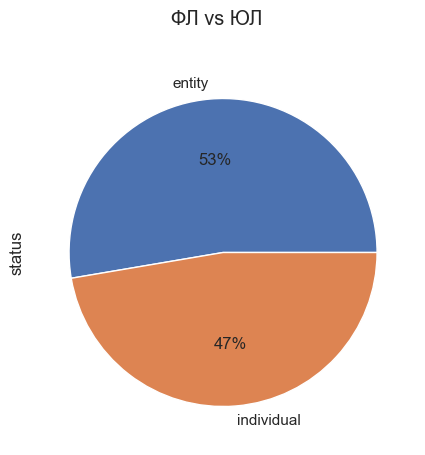

In [76]:
sns.set()
labels = ['entity','individual']
a.plot(kind='pie', title ='ФЛ vs ЮЛ', figsize=[5,5], labels = labels, subplots=True, autopct='%.0f%%')

### Individuals vs Organizations (ratio) throughout the years

In [78]:
years = agents_3[['status','year_of_inclusion']]
df_years = pd.DataFrame(years.groupby(['status','year_of_inclusion']).value_counts().reset_index())
df_years.columns

Index(['status', 'year_of_inclusion', 0], dtype='object')

In [79]:
df_years

,status,year_of_inclusion,0
0,entity,2013,1
1,entity,2014,29
2,entity,2015,81
3,entity,2016,43
4,entity,2017,25
5,entity,2018,7
6,entity,2019,14
7,entity,2020,12
8,entity,2021,40
9,entity,2022,41


In [80]:
years = df_years.year_of_inclusion.unique().tolist()
years

[2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

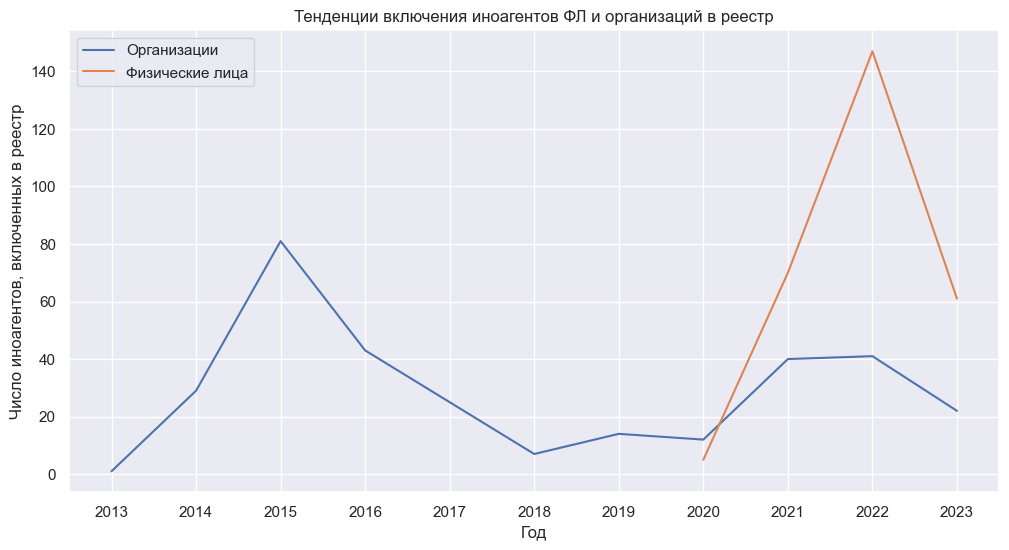

In [81]:
ax = sns.lineplot(data=df_years, x="year_of_inclusion", y = df_years[0], hue= 'status')
ax.set(xlabel='Год', xticks = years, ylabel='Число иноагентов, включенных в реестр', title = "Тенденции включения иноагентов ФЛ и организаций в реестр")
ax.legend(['Организации','Физические лица'])


### Until 2020, individuals were not included in the registry at all

In [82]:
agents_3.year_of_inclusion.unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

Text(0, 0.5, 'Количество включенных иноагентов')

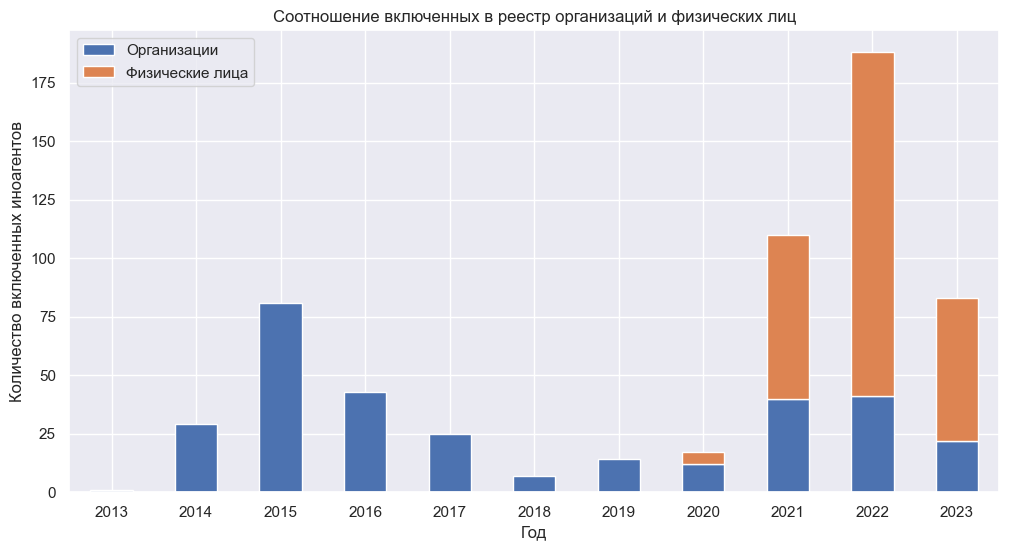

In [83]:
df_1 = agents_3.groupby(['status','year_of_inclusion']).size().reset_index().pivot(columns = 'status', index='year_of_inclusion', values = 0)
ax = df_1.plot(kind='bar', stacked = True)
ax.legend(['Организации','Физические лица'])
plt.xticks(rotation=0)
plt.title('Соотношение включенных в реестр организаций и физических лиц')
plt.xlabel('Год')
plt.ylabel('Количество включенных иноагентов')
# ax.set(xlabel='Год', xticks = years, ylabel='Число иноагентов, включенных в реестр', title = "Тенденции включения иноагентов ФЛ и")


<AxesSubplot:xlabel='year_of_inclusion'>

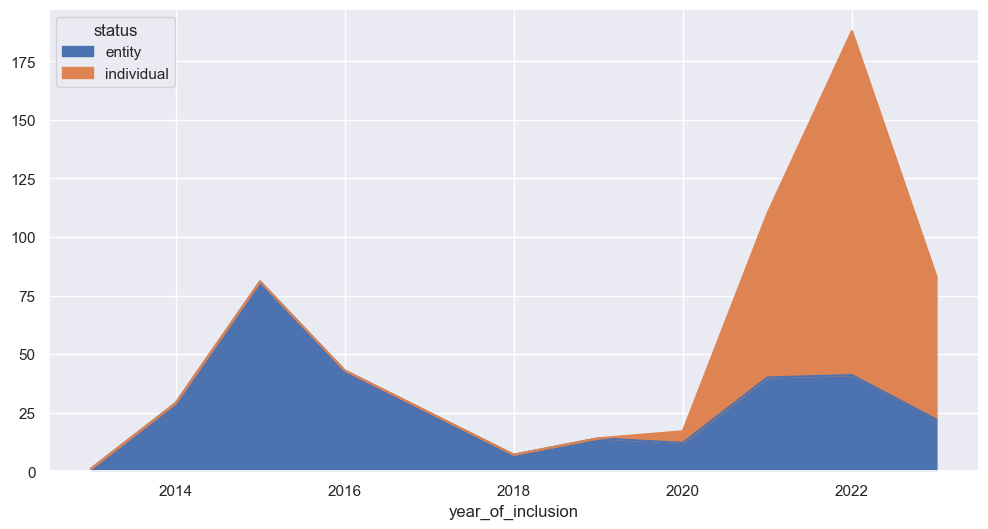

In [84]:
df_1.plot.area()

In [85]:
agents_3[agents_3['year_of_inclusion'] == 2022].status.value_counts()

individual    147
entity         41
Name: status, dtype: int64

### First individuals included in the list

In [86]:
agents_3[agents_3['date_of_inclusion'] == agents_3[agents_3.status == 'individual']['date_of_inclusion'].min()]

,name,birth_date,grounds_for_inclusion,date_of_inclusion,date_of_exclusion,status,form,occupation,sex,year_of_inclusion
211,Апахончич Дарья Александровна,24.03.1985,Статья 6 Закона Российской Федерации от 27.12....,2020-12-28,NaT,individual,ФЛ_СМИ,художник,female,2020
212,Камалягин Денис Николаевич,22.02.1985,Статья 6 Закона Российской Федерации от 27.12....,2020-12-28,NaT,individual,ФЛ_СМИ,журналист,male,2020
213,Маркелов Сергей Евгеньевич,11.10.1986,Статья 6 Закона Российской Федерации от 27.12....,2020-12-28,NaT,individual,ФЛ_СМИ,журналист,male,2020
214,Пономарев Лев Александрович,02.09.1941,Статья 6 Закона Российской Федерации от 27.12....,2020-12-28,NaT,individual,ФЛ_СМИ,юрист/адвокат/правозащитник,male,2020
215,Савицкая Людмила Алексеевна,22.01.1991,Статья 6 Закона Российской Федерации от 27.12....,2020-12-28,NaT,individual,ФЛ_СМИ,журналист,female,2020


### Categories of foreign agents and their distribution

In [87]:
b = pd.DataFrame(agents_3.form.value_counts())
b.index

Index(['НКО', 'ФЛ_СМИ', 'Статья_7', 'ФЛ', 'СМИ', 'Общественные объединения',
       'Статья_9'],
      dtype='object')

In [88]:
old = agents_3[agents_3.form.isin(['НКО','ФЛ_СМИ','ФЛ','СМИ','Общественные объединения'])]
b = pd.DataFrame(old.form.value_counts())
b_list = b.index.tolist()

In [375]:
b['%'] = round(old.form.value_counts(normalize = True)*100,2)
b

,form,%
НКО,218,44.22
ФЛ_СМИ,175,35.50
ФЛ,62,12.58
СМИ,27,5.48
Общественные объединения,11,2.23


([<matplotlib.patches.Wedge at 0x12ebe02e0>,
 [Text(0.1986782805943382, 1.0819089337000956, 'НКО'),
  Text(-0.803399313743722, -0.7513651194167299, 'ФЛ_СМИ'),
  Text(0.7013823663302798, -0.8473858484780928, 'ФЛ'),
  Text(1.0468100631521455, -0.3379181730588064, 'СМИ'),
  Text(1.097298674042958, -0.07704297465419231, 'Общественные объединения')],
 [Text(0.10836997123327537, 0.5901321456545975, '44%'),
  Text(-0.43821780749657563, -0.4098355196818526, '35%'),
  Text(0.38257219981651625, -0.46221046280623235, '13%'),
  Text(0.5709873071738975, -0.18431900348662167, '5%'),
  Text(0.598526549477977, -0.042023440720468534, '2%')])

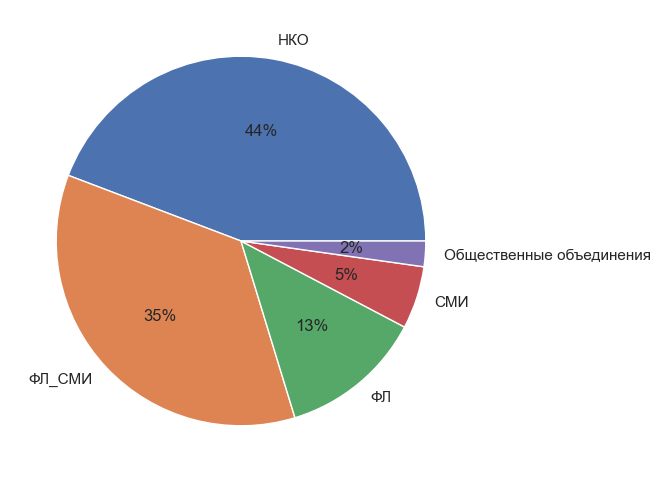

In [89]:
# sns.set()
labels = b_list
plt.pie(b.form, labels = labels, autopct='%.0f%%')
# ax = b.plot(kind='pie', title ='Формы иноагентов', subplots=True, autopct='%.0f%%')

In [90]:
agents_3[agents_3.year_of_inclusion == 2023]['grounds_for_inclusion'].unique()

array(['Статья 7 Федерального закона от 14.07.2022 № 255-ФЗ«О контроле за деятельностью лиц, находящихся под иностранным влиянием»',
       'Статья 9 Федерального закона от 14.07.2022 № 255-ФЗ«О контроле за деятельностью лиц, находящихся под иностранным влиянием»'],
      dtype=object)

### Professional occupation of foreign agents-individuals

In [91]:
prof = pd.DataFrame(agents_3[agents_3.status == 'individual'].occupation.value_counts().reset_index())

In [92]:
prof

,index,occupation
0,журналист,118
1,общественный/политический деятель,65
2,активист,17
3,юрист/адвокат/правозащитник,16
4,блогер,15
5,политолог/политтехнолог,12
6,музыкант,11
7,учёный,6
8,писатель,5
9,артист,4


In [93]:
new_prof = prof[prof.occupation >4]

In [94]:
new_row = {'index':'иное', 'occupation': 14,}
prof2 = new_prof.append(new_row,ignore_index=True)

/var/folders/8z/g1v85qt55t999sxjpnmjb4tr0000gn/T/ipykernel_7841/3471828557.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prof2 = new_prof.append(new_row,ignore_index=True)


In [95]:
prof2['%'] = round(prof2.occupation/ prof2.occupation.sum(),2)

In [96]:
prof2

,index,occupation,%
0,журналист,118,0.42
1,общественный/политический деятель,65,0.23
2,активист,17,0.06
3,юрист/адвокат/правозащитник,16,0.06
4,блогер,15,0.05
5,политолог/политтехнолог,12,0.04
6,музыкант,11,0.04
7,учёный,6,0.02
8,писатель,5,0.02
9,иное,14,0.05


([<matplotlib.patches.Wedge at 0x12ead2280>,
 [Text(0.26370977557982334, 1.0679218858435477, 'журналист'),
  Text(-1.0664202672033034, -0.2697180262756559, 'общественный/политический деятель'),
  Text(-0.42809339554925413, -1.0132798451992964, 'активист'),
  Text(-0.030961434179845475, -1.0995641816617743, 'юрист/адвокат/правозащитник'),
  Text(0.34697887049474674, -1.0438417808414213, 'блогер'),
  Text(0.6435538992406845, -0.8920977405935469, 'политолог/политтехнолог'),
  Text(0.8505570025042424, -0.6975333579772356, 'музыкант'),
  Text(0.967731232520547, -0.5229687004059259, 'учёный'),
  Text(1.0249278289463206, -0.3994032366561167, 'писатель'),
  Text(1.0863601240363536, -0.17268955065005687, 'иное')],
 [Text(0.1438416957708127, 0.5825028468237532, '42%'),
  Text(-0.5816837821108927, -0.14711892342308502, '23%'),
  Text(-0.2335054884814113, -0.5526980973814343, '6%'),
  Text(-0.01688805500718844, -0.5997622809064223, '6%'),
  Text(0.18926120208804365, -0.5693682440953207, '5%'),
  T

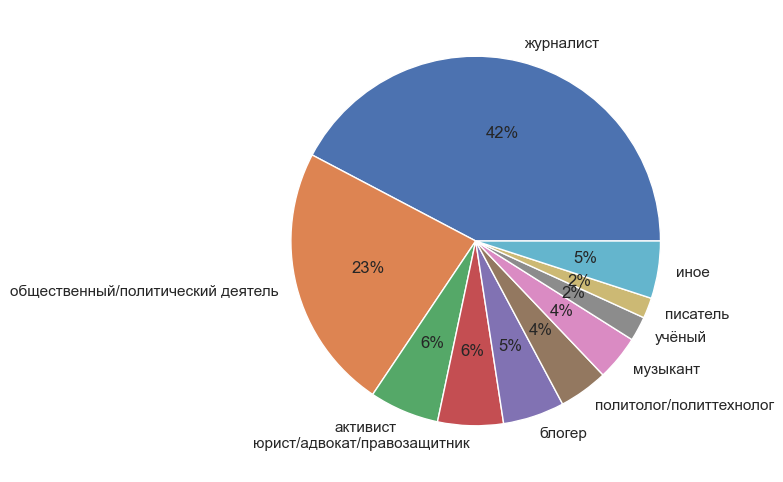

In [97]:
labels = prof2['index']
plt.pie(prof2.occupation, labels = labels, autopct='%.0f%%')

In [98]:
prof[prof['occupation'] < 4].sum()

index         предпринимательхудожникпублицисткинопрокатчикк...
occupation                                                   14
dtype: object

In [99]:
prof['index'][prof['occupation'] <4] = 'иное'

/var/folders/8z/g1v85qt55t999sxjpnmjb4tr0000gn/T/ipykernel_7841/2330284170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prof['index'][prof['occupation'] <4] = 'иное'


In [100]:
prof

,index,occupation
0,журналист,118
1,общественный/политический деятель,65
2,активист,17
3,юрист/адвокат/правозащитник,16
4,блогер,15
5,политолог/политтехнолог,12
6,музыкант,11
7,учёный,6
8,писатель,5
9,артист,4


### Demographic characteristics of individuals recognized as foreign agents

In [101]:
ind_agents = agents_3[agents_3.status == 'individual']
ind_agents['birth_date'] = pd.to_datetime(ind_agents['birth_date'], format='%d.%m.%Y') 

/var/folders/8z/g1v85qt55t999sxjpnmjb4tr0000gn/T/ipykernel_7841/2991196032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_agents['birth_date'] = pd.to_datetime(ind_agents['birth_date'], format='%d.%m.%Y')


In [102]:
ind_agents.birth_date.min()

Timestamp('1941-09-02 00:00:00')

In [103]:
ind_agents[ind_agents.birth_date == ind_agents.birth_date.min()]

,name,birth_date,grounds_for_inclusion,date_of_inclusion,date_of_exclusion,status,form,occupation,sex,year_of_inclusion
214,Пономарев Лев Александрович,1941-09-02,Статья 6 Закона Российской Федерации от 27.12....,2020-12-28,NaT,individual,ФЛ_СМИ,юрист/адвокат/правозащитник,male,2020


In [104]:
a = ind_agents['birth_date']

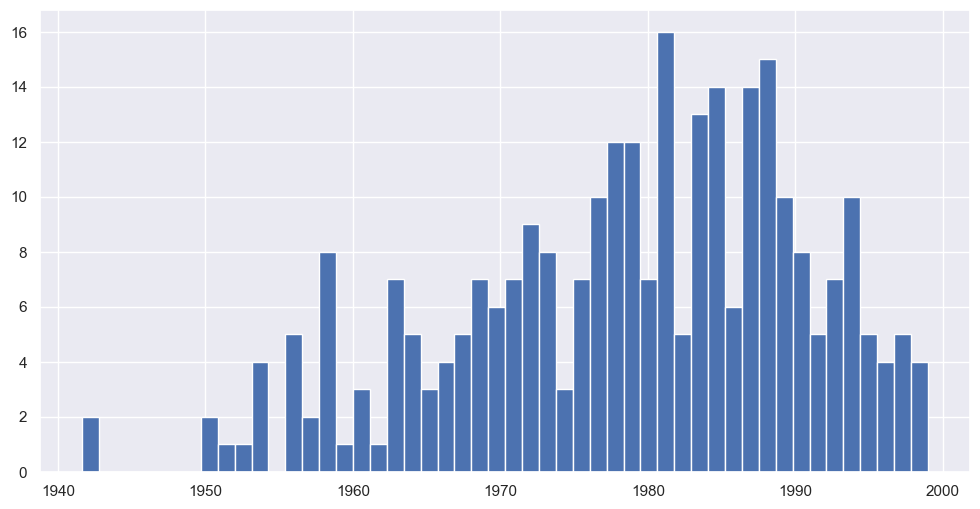

In [105]:
plt.hist(a, bins = 50)
plt.show() 

In [106]:
ind_agents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283 entries, 211 to 595
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   283 non-null    string        
 1   birth_date             283 non-null    datetime64[ns]
 2   grounds_for_inclusion  283 non-null    object        
 3   date_of_inclusion      283 non-null    datetime64[ns]
 4   date_of_exclusion      10 non-null     datetime64[ns]
 5   status                 283 non-null    object        
 6   form                   283 non-null    object        
 7   occupation             283 non-null    object        
 8   sex                    283 non-null    object        
 9   year_of_inclusion      283 non-null    int64         
dtypes: datetime64[ns](3), int64(1), object(5), string(1)
memory usage: 24.3+ KB


In [107]:
from datetime import datetime, timedelta

In [108]:
ini_time_for_now = datetime.now()

In [109]:
ind_agents['age'] = (datetime.now() - ind_agents['birth_date'])
ind_agents['age'] = ind_agents['age'].dt.days
ind_agents['age_in_years'] = round(ind_agents['age']/365.25)

/var/folders/8z/g1v85qt55t999sxjpnmjb4tr0000gn/T/ipykernel_7841/2182790094.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_agents['age'] = (datetime.now() - ind_agents['birth_date'])
/var/folders/8z/g1v85qt55t999sxjpnmjb4tr0000gn/T/ipykernel_7841/2182790094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_agents['age'] = ind_agents['age'].dt.days
/var/folders/8z/g1v85qt55t999sxjpnmjb4tr0000gn/T/ipykernel_7841/2182790094.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [110]:
c = ind_agents['age_in_years']

{'whiskers': [<matplotlib.lines.Line2D at 0x12fa77b20>,
 'caps': [<matplotlib.lines.Line2D at 0x12fa62100>,
 'boxes': [<matplotlib.lines.Line2D at 0x12fa77880>],
 'medians': [<matplotlib.lines.Line2D at 0x12fa626a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x12fa62970>],
 'means': []}

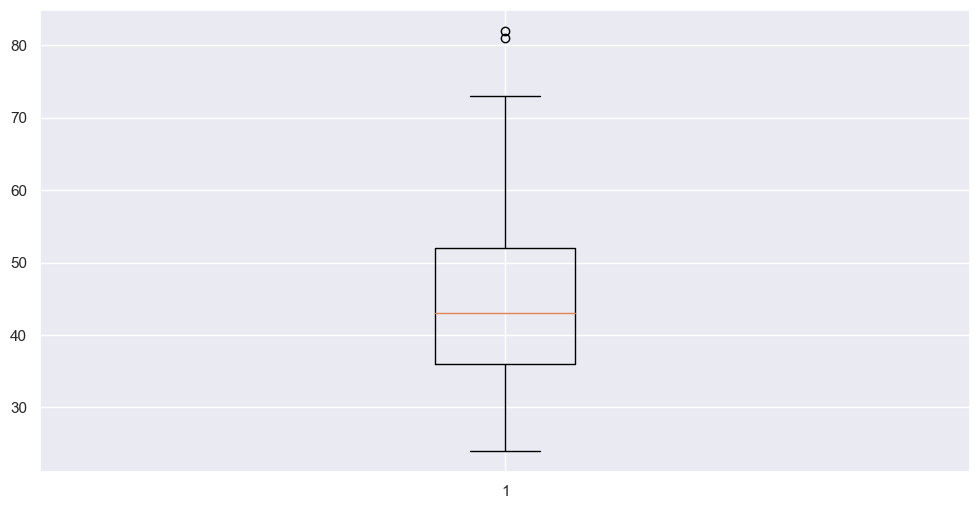

In [111]:
plt.boxplot(c)

In [112]:
from scipy.stats import iqr

In [113]:
iqr(c)

16.0

In [114]:
c.describe()

count    283.000000
mean      44.770318
std       11.893152
min       24.000000
25%       36.000000
50%       43.000000
75%       52.000000
max       82.000000
Name: age_in_years, dtype: float64

In [115]:
ind_agents[ind_agents.age_in_years == 82]

,name,birth_date,grounds_for_inclusion,date_of_inclusion,date_of_exclusion,status,form,occupation,sex,year_of_inclusion,age,age_in_years
214,Пономарев Лев Александрович,1941-09-02,Статья 6 Закона Российской Федерации от 27.12....,2020-12-28,NaT,individual,ФЛ_СМИ,юрист/адвокат/правозащитник,male,2020,29852,82.0


In [116]:
np.quantile(c, 0.25)

36.0

In [117]:
np.quantile(c, 0.75)

52.0

In [118]:
ind_agents[ind_agents['age_in_years']<26]

,name,birth_date,grounds_for_inclusion,date_of_inclusion,date_of_exclusion,status,form,occupation,sex,year_of_inclusion,age,age_in_years
229,Маняхин Петр Борисович,1998-09-14,Статья 6 Закона Российской Федерации от 27.12....,2021-07-15,NaT,individual,ФЛ_СМИ,журналист,male,2021,9021,25.0
304,Скворцова Елена Сергеевна,1998-12-25,Статья 6 Закона Российской Федерации от 27.12....,2021-11-08,NaT,individual,ФЛ_СМИ,юрист/адвокат/правозащитник,female,2021,8919,24.0
385,Моргенштерн Алишер Тагирович,1998-02-17,Статья 2.1 Федерального закона от 28.12.2012 №...,2022-05-06,NaT,individual,ФЛ,музыкант,male,2022,9230,25.0
524,Гырдымова Елизавета Андреевна,1998-06-01,Статья 7 Федерального закона от 14.07.2022 № 2...,2023-01-20,NaT,individual,Статья_7,музыкант,female,2023,9126,25.0


In [119]:
ind_agents[ind_agents['age_in_years']>80]

,name,birth_date,grounds_for_inclusion,date_of_inclusion,date_of_exclusion,status,form,occupation,sex,year_of_inclusion,age,age_in_years
214,Пономарев Лев Александрович,1941-09-02,Статья 6 Закона Российской Федерации от 27.12....,2020-12-28,NaT,individual,ФЛ_СМИ,юрист/адвокат/правозащитник,male,2020,29852,82.0
510,Ганнушкина Светлана Алексеевна,1942-03-06,Статья 7 Федерального закона от 14.07.2022 № 2...,2022-12-23,NaT,individual,Статья_7,юрист/адвокат/правозащитник,female,2022,29667,81.0


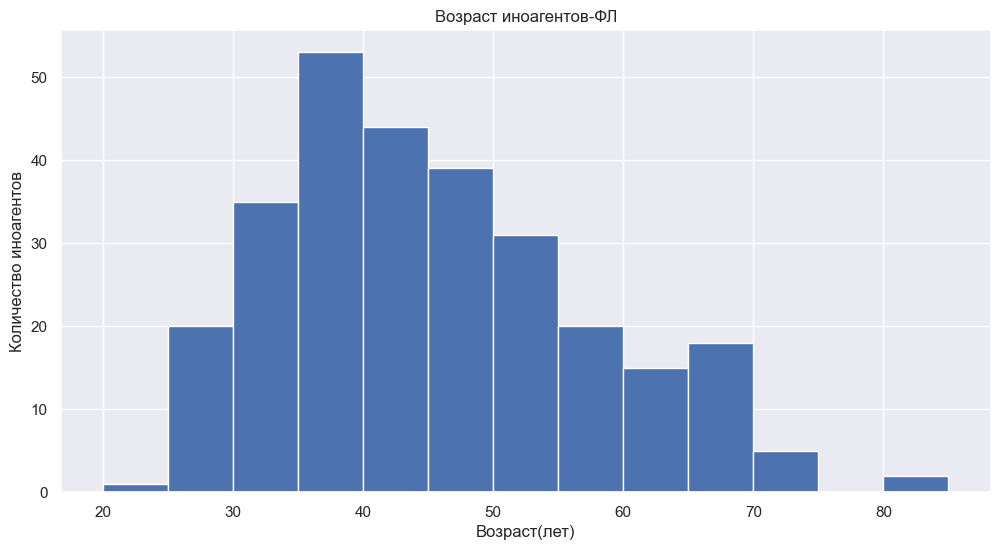

In [120]:
plt.hist(c, range = (20,85), bins = 13)
plt.title('Возраст иноагентов-ФЛ')
plt.xlabel('Возраст(лет)')
plt.ylabel('Количество иноагентов')
plt.show() 


In [121]:
c.sort_values()

304    24.0
524    25.0
229    25.0
385    25.0
299    26.0
       ... 
576    72.0
275    73.0
379    73.0
510    81.0
214    82.0
Name: age_in_years, Length: 283, dtype: float64

In [122]:
ind_agents.birth_date.max()

Timestamp('1998-12-25 00:00:00')

In [123]:
ind_agents[ind_agents.birth_date == ind_agents.birth_date.max()]

,name,birth_date,grounds_for_inclusion,date_of_inclusion,date_of_exclusion,status,form,occupation,sex,year_of_inclusion,age,age_in_years
304,Скворцова Елена Сергеевна,1998-12-25,Статья 6 Закона Российской Федерации от 27.12....,2021-11-08,NaT,individual,ФЛ_СМИ,юрист/адвокат/правозащитник,female,2021,8919,24.0


## Not only inclusion but also exclusion

### Individuals and organizations are not only included in the registry of foreign agents but also excluded from it

In [125]:
delta = agents_3[['date_of_inclusion', 'date_of_exclusion']]

In [126]:
delta['dif'] = delta['date_of_exclusion'] - delta['date_of_inclusion']

/var/folders/8z/g1v85qt55t999sxjpnmjb4tr0000gn/T/ipykernel_7841/1066529583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delta['dif'] = delta['date_of_exclusion'] - delta['date_of_inclusion']


In [128]:
delta['dif_in_months'] = round(delta['dif'].dt.days/30.4)

/var/folders/8z/g1v85qt55t999sxjpnmjb4tr0000gn/T/ipykernel_7841/2863563947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delta['dif_in_months'] = round(delta['dif'].dt.days/30.4)


In [129]:
delta.head()

,date_of_inclusion,date_of_exclusion,dif,dif_in_months
0,2013-06-27,NaT,NaT,NaN
1,2014-06-05,2020-03-13,2108 days,69.0
2,2014-06-05,2016-02-29,634 days,21.0
3,2014-06-05,2015-05-22,351 days,12.0
4,2014-06-05,2017-02-20,991 days,33.0


(array([49., 52., 22., 14.,  9.,  5.,  7.,  2.,  7.,  4.,  4.,  0.]),
 array([  0.,   9.,  18.,  27.,  36.,  45.,  54.,  63.,  72.,  81.,  90.,
         99., 108.]),
 <BarContainer object of 12 artists>)

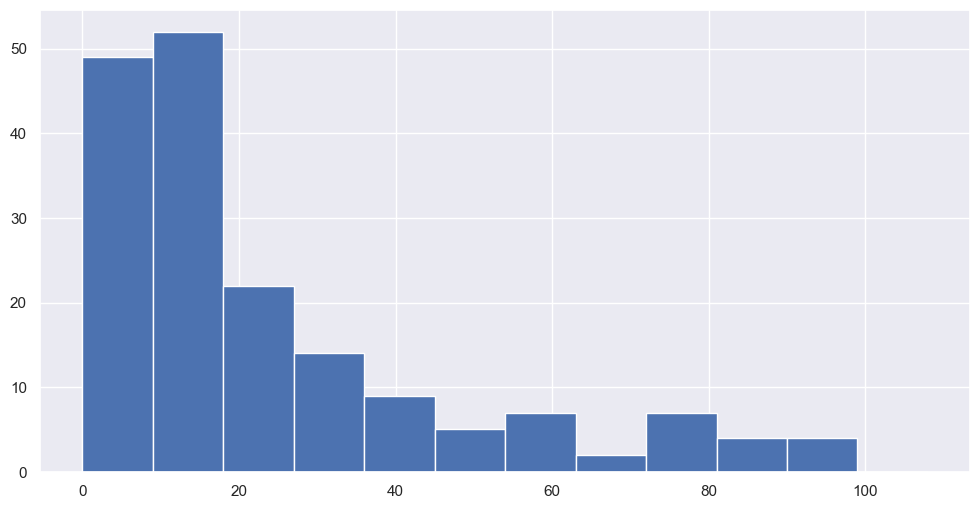

In [130]:
months = [0,12,24,36,48,60,72,84,96,108]
plt.hist(delta.dif_in_months, range = (0,108), bins = 12)

In [131]:
delta.describe()

,dif,dif_in_months
count,175,175.000000
mean,726 days 09:11:18.857142856,23.937143
std,712 days 08:23:58.059928584,23.408947
min,49 days 00:00:00,2.000000
25%,225 days 12:00:00,7.500000
50%,448 days 00:00:00,15.000000
75%,896 days 00:00:00,29.500000
max,2877 days 00:00:00,95.000000


In [133]:
from matplotlib import dates as mpl_dates

In [135]:
agents_3.head(3)

,name,birth_date,grounds_for_inclusion,date_of_inclusion,date_of_exclusion,status,form,occupation,sex,year_of_inclusion
0,«Евразийская антимонопольная ассоциация»,0,Статья 32 Федерального закона от 12.01.1996 № ...,2013-06-27,NaT,entity,НКО,NaN,NaN,2013
1,Ассоциация некоммерческих организаций «В защит...,0,Статья 32 Федерального закона от 12.01.1996 № ...,2014-06-05,2020-03-13,entity,НКО,NaN,NaN,2014
2,Региональная общественная правозащитная органи...,0,Статья 32 Федерального закона от 12.01.1996 № ...,2014-06-05,2016-02-29,entity,НКО,NaN,NaN,2014


In [136]:
agents_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 0 to 599
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   598 non-null    string        
 1   birth_date             598 non-null    object        
 2   grounds_for_inclusion  598 non-null    object        
 3   date_of_inclusion      598 non-null    datetime64[ns]
 4   date_of_exclusion      175 non-null    datetime64[ns]
 5   status                 598 non-null    object        
 6   form                   598 non-null    object        
 7   occupation             283 non-null    object        
 8   sex                    283 non-null    object        
 9   year_of_inclusion      598 non-null    int64         
dtypes: datetime64[ns](2), int64(1), object(6), string(1)
memory usage: 67.6+ KB


In [137]:
agents_3.sex.value_counts(normalize = True)

male      0.678445
female    0.321555
Name: sex, dtype: float64

In [138]:
delta['timestamp'] = pd.to_datetime(delta['date_of_inclusion']).dt.strftime('%Y/%m/%d')

/var/folders/8z/g1v85qt55t999sxjpnmjb4tr0000gn/T/ipykernel_7841/1682866663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delta['timestamp'] = pd.to_datetime(delta['date_of_inclusion']).dt.strftime('%Y/%m/%d')


In [139]:
n = pd.DataFrame(delta['timestamp'].value_counts().reset_index().sort_values(by = ['index']))

In [140]:
n['index'] = pd.to_datetime(n['index'])
n

,index,timestamp
129,2013-06-27,1
40,2014-06-05,5
41,2014-07-21,5
54,2014-08-28,2
158,2014-09-03,1
...,...,...
112,2023-04-05,1
109,2023-04-07,1
20,2023-04-14,8
37,2023-04-21,5


In [141]:
percentage_of_exclusion = round((agents_3.date_of_exclusion.count())/(agents_3.date_of_inclusion.count())*100,2)
percentage_of_exclusion

29.26

In [142]:
agents_3.date_of_exclusion.count()

175

In [143]:
agents_3.head(3)

,name,birth_date,grounds_for_inclusion,date_of_inclusion,date_of_exclusion,status,form,occupation,sex,year_of_inclusion
0,«Евразийская антимонопольная ассоциация»,0,Статья 32 Федерального закона от 12.01.1996 № ...,2013-06-27,NaT,entity,НКО,NaN,NaN,2013
1,Ассоциация некоммерческих организаций «В защит...,0,Статья 32 Федерального закона от 12.01.1996 № ...,2014-06-05,2020-03-13,entity,НКО,NaN,NaN,2014
2,Региональная общественная правозащитная органи...,0,Статья 32 Федерального закона от 12.01.1996 № ...,2014-06-05,2016-02-29,entity,НКО,NaN,NaN,2014


### Timedelta between inclusions and exclusions

In [144]:
agents_3['date_dif'] = agents_3.date_of_exclusion - agents_3.date_of_inclusion

In [145]:
inv = agents_3[['date_of_inclusion','name']]

In [146]:
line = inv['date_of_inclusion']

In [147]:
t = line.value_counts().reset_index().sort_values(by = 'index')
t2 = agents_3['date_of_exclusion'].value_counts().reset_index().sort_values(by = 'index')

In [149]:
t

,index,date_of_inclusion
129,2013-06-27,1
40,2014-06-05,5
41,2014-07-21,5
54,2014-08-28,2
158,2014-09-03,1
...,...,...
112,2023-04-05,1
109,2023-04-07,1
20,2023-04-14,8
37,2023-04-21,5


In [150]:
agents_3[['date_of_exclusion','status']].groupby('status')['date_of_exclusion'].count()

status
entity        165
individual     10
Name: date_of_exclusion, dtype: int64

<AxesSubplot:xlabel='date_of_exclusion'>

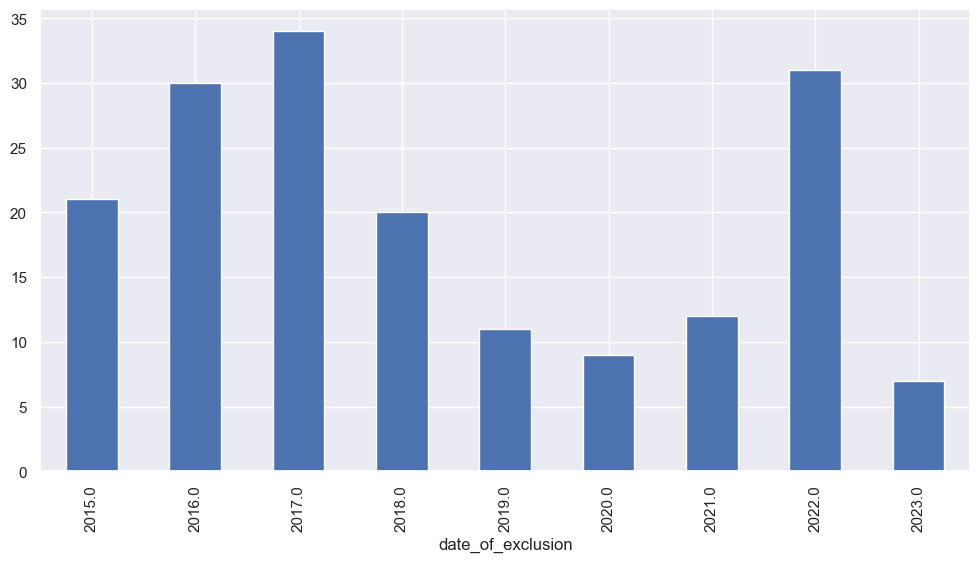

In [157]:
agents_3['date_of_exclusion'].groupby(agents_3['date_of_exclusion'].dt.year).count().plot(kind="bar")

<AxesSubplot:xlabel='date_of_inclusion'>

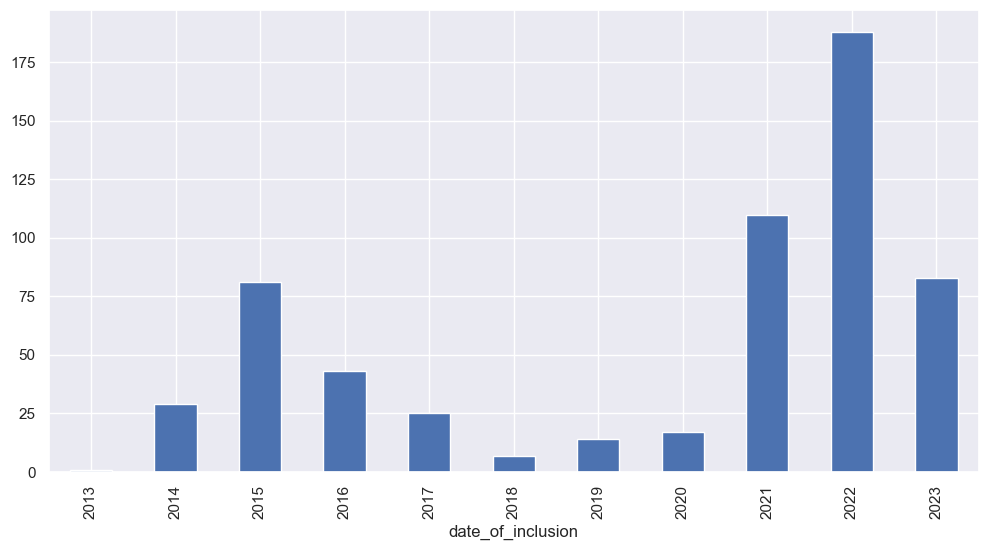

In [156]:
agents_3['date_of_inclusion'].groupby(agents_3['date_of_inclusion'].dt.year).count().plot(kind="bar")

In [158]:
incl_data = agents_3['date_of_inclusion'].groupby(agents_3['date_of_inclusion'].dt.year).count()
excl_data = agents_3['date_of_exclusion'].groupby(agents_3['date_of_exclusion'].dt.year).count()

In [159]:
incl_data

date_of_inclusion
2013      1
2014     29
2015     81
2016     43
2017     25
2018      7
2019     14
2020     17
2021    110
2022    188
2023     83
Name: date_of_inclusion, dtype: int64

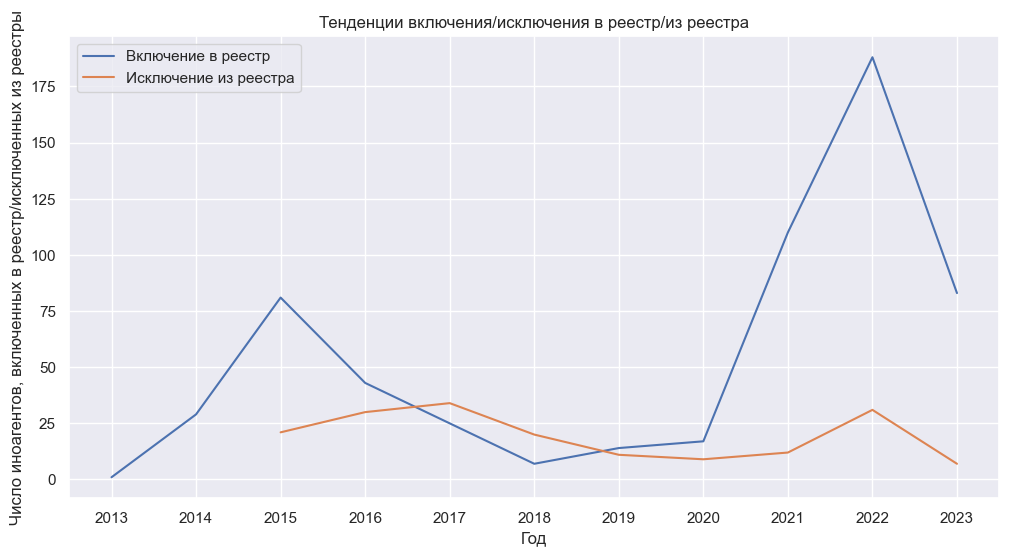

In [161]:
ax = sns.lineplot(data = incl_data)
ax2 = sns.lineplot(data = excl_data)
ax.set(xlabel='Год', xticks = years, ylabel='Число иноагентов, включенных в реестр/исключенных из реестры', title = "Тенденции включения/исключения в реестр/из реестра")
ax.legend(['Включение в реестр','Исключение из реестра'])

In [162]:
inc = pd.DataFrame(incl_data).rename(columns ={'date_of_inclusion':'date'})
exc = pd.DataFrame(excl_data).rename(columns ={'date_of_exclusion':'date'})
inc = inc.reset_index()
exc = exc.reset_index()

In [163]:
exc

,date_of_exclusion,date
0,2015.0,21
1,2016.0,30
2,2017.0,34
3,2018.0,20
4,2019.0,11
5,2020.0,9
6,2021.0,12
7,2022.0,31
8,2023.0,7


In [164]:
df2 = pd.merge(inc,exc, how = 'left', left_on='date_of_inclusion', right_on='date_of_exclusion')
df3 = df2[['date_of_inclusion','date_x','date_y']]
df3 = df3.fillna(0)
df3['date_y'] = df3['date_y'].astype(int)
# df3

In [165]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   date_of_inclusion  11 non-null     int64
 1   date_x             11 non-null     int64
 2   date_y             11 non-null     int64
dtypes: int64(3)
memory usage: 352.0 bytes


In [166]:
df3.to_csv('/Users/anastasia/Downloads/df3.csv')

In [167]:
delta.describe()

,dif,dif_in_months
count,175,175.000000
mean,726 days 09:11:18.857142856,23.937143
std,712 days 08:23:58.059928584,23.408947
min,49 days 00:00:00,2.000000
25%,225 days 12:00:00,7.500000
50%,448 days 00:00:00,15.000000
75%,896 days 00:00:00,29.500000
max,2877 days 00:00:00,95.000000


In [168]:
agents_3[agents_3.date_dif == agents_3.date_dif.max()].name

32    «Частное учреждение в Санкт-Петербурге по адми...
Name: name, dtype: string

In [169]:
agents_3.date_of_exclusion.count()

175

In [170]:
# agents_3[['date_of_inclusion','date_of_exclusion']].groupby(agents_3[['date_of_inclusion','date_of_exclusion']].dt.year).count()

In [171]:
df3[['date_x','date_y']]

,date_x,date_y
0,1,0
1,29,0
2,81,21
3,43,30
4,25,34
5,7,20
6,14,11
7,17,9
8,110,12
9,188,31


Text(0.5, 1.0, 'Тенденции включения в реестр/исключения из реестра')

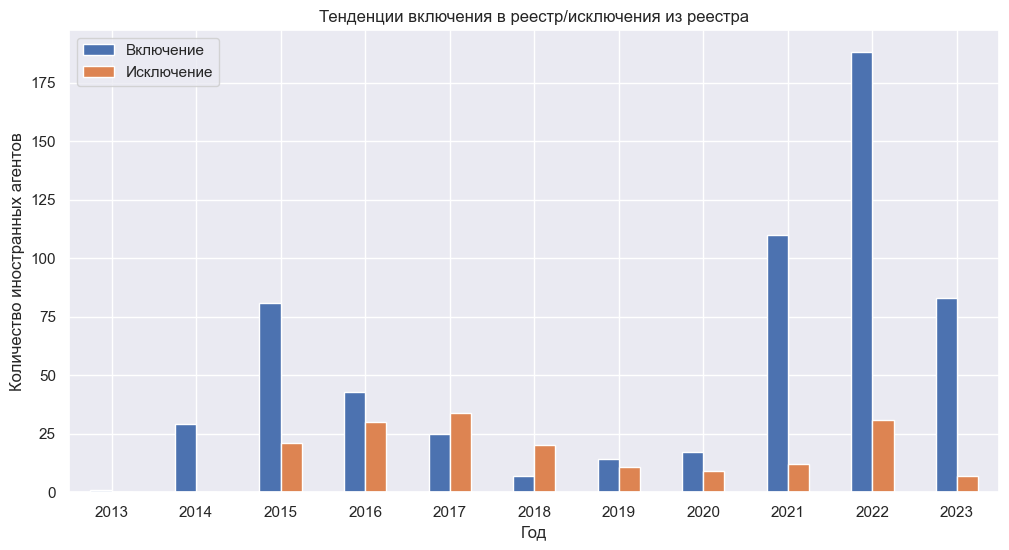

In [172]:
labels = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
ax = df3[['date_x','date_y']].plot(kind='bar')
ax.set_xticklabels(labels) 
plt.legend(['Включение', 'Исключение'])
plt.xticks(rotation = 0)
plt.xlabel('Год')
plt.ylabel('Количество иностранных агентов')
plt.title('Тенденции включения в реестр/исключения из реестра')


In [173]:
df2

,date_of_inclusion,date_x,date_of_exclusion,date_y
0,2013,1,NaN,NaN
1,2014,29,NaN,NaN
2,2015,81,2015.0,21.0
3,2016,43,2016.0,30.0
4,2017,25,2017.0,34.0
5,2018,7,2018.0,20.0
6,2019,14,2019.0,11.0
7,2020,17,2020.0,9.0
8,2021,110,2021.0,12.0
9,2022,188,2022.0,31.0


In [174]:
df2.date_y = df2.date_y.fillna(0)

In [175]:
agents_3.date_of_exclusion.iloc[0]

NaT

# Excluded

In [176]:
agents_3['year_of_inclusion'] = agents_3.date_of_inclusion.dt.year
agents_3['month_year_of_inclusion'] = agents_3['date_of_inclusion'].dt.to_period('M')
agents_3['weekday'] = agents_3['date_of_inclusion'].dt.weekday

In [177]:
excluded = agents_3[agents_3.date_of_exclusion.notnull()]

In [178]:
excluded.form.value_counts()

НКО         162
ФЛ_СМИ       11
Статья_7      2
Name: form, dtype: int64

In [179]:
excluded[excluded.form == 'Статья_7']

,name,birth_date,grounds_for_inclusion,date_of_inclusion,date_of_exclusion,status,form,occupation,sex,year_of_inclusion,date_dif,month_year_of_inclusion,weekday
501,Региональная общественная организация «Экологи...,0,Статья 7 Федерального закона от 14.07.2022 № 2...,2022-12-16,2023-04-11,entity,Статья_7,NaN,NaN,2022,116 days,2022-12,4
502,Автономная некоммерческая организация«Центр со...,0,Статья 7 Федерального закона от 14.07.2022 № 2...,2022-12-16,2023-04-11,entity,Статья_7,NaN,NaN,2022,116 days,2022-12,4


In [180]:
excluded.status.value_counts()

entity        165
individual     10
Name: status, dtype: int64

In [181]:
excluded.form.value_counts()

НКО         162
ФЛ_СМИ       11
Статья_7      2
Name: form, dtype: int64

In [182]:
excluded.year_of_inclusion.value_counts()

2015    68
2016    34
2014    21
2017    13
2021    12
2019     9
2020     7
2022     7
2018     4
Name: year_of_inclusion, dtype: int64

In [183]:
excluded.weekday.value_counts()

4    49
2    42
1    31
3    27
0    26
Name: weekday, dtype: int64

In [184]:
excluded.grounds_for_inclusion.value_counts()

Статья 32 Федерального закона от 12.01.1996 № 7-ФЗ «О некоммерческих организациях»                                            162
Статья 6 Закона Российской Федерации от 27.12.1991 № 2124-1 «О средствах массовой информации»                                  11
Статья 7 Федерального закона от 14.07.2022 № 255-ФЗ«О контроле за деятельностью лиц, находящихся под иностранным влиянием»      2
Name: grounds_for_inclusion, dtype: int64

In [185]:
excluded[excluded.status == 'individual'].count()

name                       10
birth_date                 10
grounds_for_inclusion      10
date_of_inclusion          10
date_of_exclusion          10
status                     10
form                       10
occupation                 10
sex                        10
year_of_inclusion          10
date_dif                   10
month_year_of_inclusion    10
weekday                    10
dtype: int64

In [186]:
excluded[excluded.status == 'entity']

,name,birth_date,grounds_for_inclusion,date_of_inclusion,date_of_exclusion,status,form,occupation,sex,year_of_inclusion,date_dif,month_year_of_inclusion,weekday
1,Ассоциация некоммерческих организаций «В защит...,0,Статья 32 Федерального закона от 12.01.1996 № ...,2014-06-05,2020-03-13,entity,НКО,NaN,NaN,2014,2108 days,2014-06,3
2,Региональная общественная правозащитная органи...,0,Статья 32 Федерального закона от 12.01.1996 № ...,2014-06-05,2016-02-29,entity,НКО,NaN,NaN,2014,634 days,2014-06,3
3,Автономная некоммерческая научно-исследователь...,0,Статья 32 Федерального закона от 12.01.1996 № ...,2014-06-05,2015-05-22,entity,НКО,NaN,NaN,2014,351 days,2014-06,3
4,Региональная общественная организация в защиту...,0,Статья 32 Федерального закона от 12.01.1996 № ...,2014-06-05,2017-02-20,entity,НКО,NaN,NaN,2014,991 days,2014-06,3
5,Некоммерческая организация Фонд «Костромской ц...,0,Статья 32 Федерального закона от 12.01.1996 № ...,2014-06-05,2015-06-19,entity,НКО,NaN,NaN,2014,379 days,2014-06,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,Автономная некоммерческая организация для изда...,0,Статья 32 Федерального закона от 12.01.1996 № ...,2022-03-24,2023-04-26,entity,НКО,NaN,NaN,2022,398 days,2022-03,3
378,Общество с ограниченной ответственностью «Апол...,0,Статья 6 Закона Российской Федерации от 27.12....,2022-05-06,2022-09-14,entity,ФЛ_СМИ,NaN,NaN,2022,131 days,2022-05,4
391,Томская региональная общественная организация ...,0,Статья 32 Федерального закона от 12.01.1996 № ...,2022-05-27,2022-12-06,entity,НКО,NaN,NaN,2022,193 days,2022-05,4
501,Региональная общественная организация «Экологи...,0,Статья 7 Федерального закона от 14.07.2022 № 2...,2022-12-16,2023-04-11,entity,Статья_7,NaN,NaN,2022,116 days,2022-12,4


### The most popular day for inclusion

In [188]:
agents_3.weekday.value_counts(normalize = True)

4    0.588629
2    0.127090
3    0.107023
0    0.093645
1    0.083612
Name: weekday, dtype: float64

In [189]:
agents_3.month_year_of_inclusion.value_counts()

2022-10    39
2022-04    36
2021-09    32
2022-09    25
2022-12    22
           ..
2019-11     1
2020-02     1
2020-04     1
2020-10     1
2018-05     1
Freq: M, Name: month_year_of_inclusion, Length: 82, dtype: int64

In [190]:
agents_3.year_of_inclusion.value_counts()

2022    188
2021    110
2023     83
2015     81
2016     43
2014     29
2017     25
2020     17
2019     14
2018      7
2013      1
Name: year_of_inclusion, dtype: int64

In [197]:
years = agents_3['year_of_inclusion'].unique().tolist()
weekdays = agents_3[['year_of_inclusion','weekday']].value_counts().to_dict()

In [198]:
c = pd.DataFrame(agents_3[['year_of_inclusion','weekday']].value_counts())

In [199]:
years = agents_3['year_of_inclusion'].unique().tolist()
weekdays = agents_3[['year_of_inclusion','weekday']].value_counts().to_dict()

In [200]:
c2 = c.reset_index()

In [201]:
c2.head()

,year_of_inclusion,weekday,0
0,2022,4,170
1,2023,4,76
2,2021,4,53
3,2021,2,31
4,2015,4,31


In [202]:
agents_3.weekday.value_counts(normalize = True)

4    0.588629
2    0.127090
3    0.107023
0    0.093645
1    0.083612
Name: weekday, dtype: float64

In [203]:
c2.weekday[c2.weekday == 0] = 'Пн'
c2.weekday[c2.weekday == 1] = 'Вт'
c2.weekday[c2.weekday == 2] = 'Ср'
c2.weekday[c2.weekday == 3] = 'Чт'
c2.weekday[c2.weekday == 4] = 'Пт'

Text(0, 0.5, 'Число включенных в реестр иноагентов')

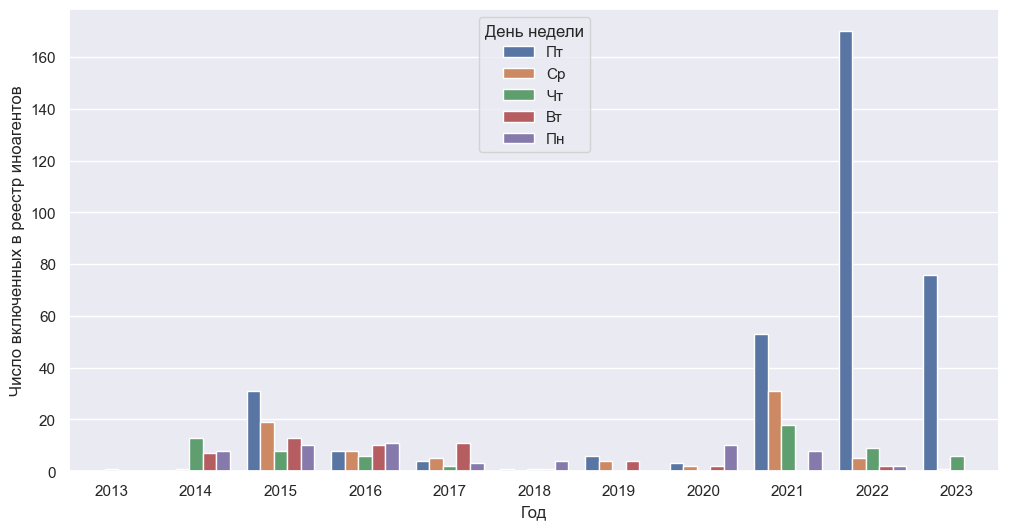

In [204]:
sns.barplot(data = c2, x = c2['year_of_inclusion'], y = c2[0], hue="weekday")
plt.legend(title="День недели", labelcolor = None, loc = 'best')
plt.xlabel('Год')
plt.ylabel('Число включенных в реестр иноагентов')

In [545]:
ind_agents.to_csv('/Users/anastasia/Downloads/ind_agents.csv')
agents_3.to_csv('/Users/anastasia/Downloads/agents_3.csv')